### **Goals:**
- **Task:** Explore the "All Weather" portfolio and experiment with cryptocurrency.
- **Use Case:** Analyze portfolio performance and determine the best investment strategy.
- **Why?**
  - Ray Dalio’s "All Weather" portfolio is well-known and widely recognized. It serves as a solid foundation for building a conservative ETF portfolio.
  - We'll model the portfolio by downloading freely available data and using portfolio optimization libraries.
  - Expand the asset classes by incorporating cryptocurrencies.

### **Plan:**
1. **Data Imports, Downloads, and Tools:**
   - Download asset data using Yahoo Finance (`yfinance`), including all asset classes and crypto pairs.
   - Introduce the `Riskfolio-lib` and `vectorbt` libraries.

2. **Classic "All Weather" Portfolio:**
   - Apply the classic "All Weather" portfolio weights and evaluate its performance.

3. **Sharpe Optimized Weights and Efficient Frontier:**
   - Construct Sharpe-optimized weights for the "All Weather" portfolio.
   - Build an Efficient Frontier and examine asset allocation at different points.

4. **Add Bitcoin (BTC):**
   - Analyze the correlation of crypto assets and incorporate Bitcoin (BTC-USD) into the "All Weather" portfolio.
   - Discuss the impact of a 7% Bitcoin allocation in the optimized portfolio.

5. **Add More Cryptocurrencies:**
   - Introduce 7 additional cryptocurrencies to the portfolio.
   - Evaluate the implications of an 8% total crypto allocation on overall performance.

### **Links:**
* Full article: https://pythoninvest.com/long-read/all-weather-portfolio-with-crypto
* Support PythonInvest (BuyMeACoffee): https://buymeacoffee.com/pythoninvest
* Support PythonInvest (GitHub sponsorship): https://github.com/sponsors/realmistic

In [ ]:
# https://medium.com/analytics-vidhya/python-how-to-get-bitcoin-data-in-real-time-less-than-1-second-lag-38772da43740
!pip install yfinance

In [ ]:
!pip install plotly

In [ ]:
# IMPORTS
# Raw Package
import numpy as np
import pandas as pd
#Data Source
import yfinance as yf
#Data viz
import plotly.graph_objs as go

In [ ]:
!pip install Riskfolio-Lib

  Using cached numpy-2.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires numba>=0.57, but you have numba 0.56.4 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 2.1.2 which is incompatible.
pytensor 2.25.5 requires numpy<2,>=1.17.0, but you have numpy 2.1.2 which is incompatible.
rmm-cu12 24.10.0 requi

In [ ]:
!pip install vectorbt

  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
riskfolio-lib 6.3.1 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.16 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.15 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
bigframes 1.22.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1

In [ ]:
# %pip install --force-reinstall numba
# %pip install numba==0.56.4
# %pip install --upgrade riskfolio-lib
# %pip install --upgrade vectorbt
# %pip install --force-reinstall Riskfolio-Lib

In [ ]:
# Import Portfolio opt. and simulation libraries
import vectorbt as vbt
import riskfolio as rp
import warnings

#All weather portfolio optimization

In [ ]:
from datetime import datetime, timedelta

# Define the tickers of the assets according to the All Weather Portfolio
start = '2010-01-01'

# middle is 2018 as we want all crypto asset to be alive
middle = '2018-01-01'
# Get the current date and subtract 3 days
end = (datetime.now() - timedelta(days=3)).strftime('%Y-%m-%d')

print("Start date:", start)
print("End date:", end)

Start date: 2010-01-01
End date: 2024-10-16


In [ ]:
# Define the tickers of the assets according to the All Weather Portfolio

# Tickers of assets
assets = ['GLD', 'GSG', 'IEI', 'TLT', 'VTI']


# Downloading data: only TEST period
data = yf.download(assets, start = middle, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets


[*********************100%***********************]  5 of 5 completed


In [ ]:
print(data.head())

                               GLD     GSG      IEI      TLT      VTI
Date                                                                 
2018-01-02 00:00:00+00:00 125.1500 16.3700 108.2868 106.1801 123.7251
2018-01-03 00:00:00+00:00 124.8200 16.5400 108.3134 106.6878 124.4412
2018-01-04 00:00:00+00:00 125.4600 16.5400 108.2068 106.6709 124.9156
2018-01-05 00:00:00+00:00 125.3300 16.4000 108.1447 106.3662 125.6496
2018-01-08 00:00:00+00:00 125.3100 16.4300 108.1359 106.2985 125.9361


In [ ]:
# Define the weights of the assets according to the All Weather Portfolio
weights_1 = [0.075, 0.075, 0.15, 0.4, 0.3]


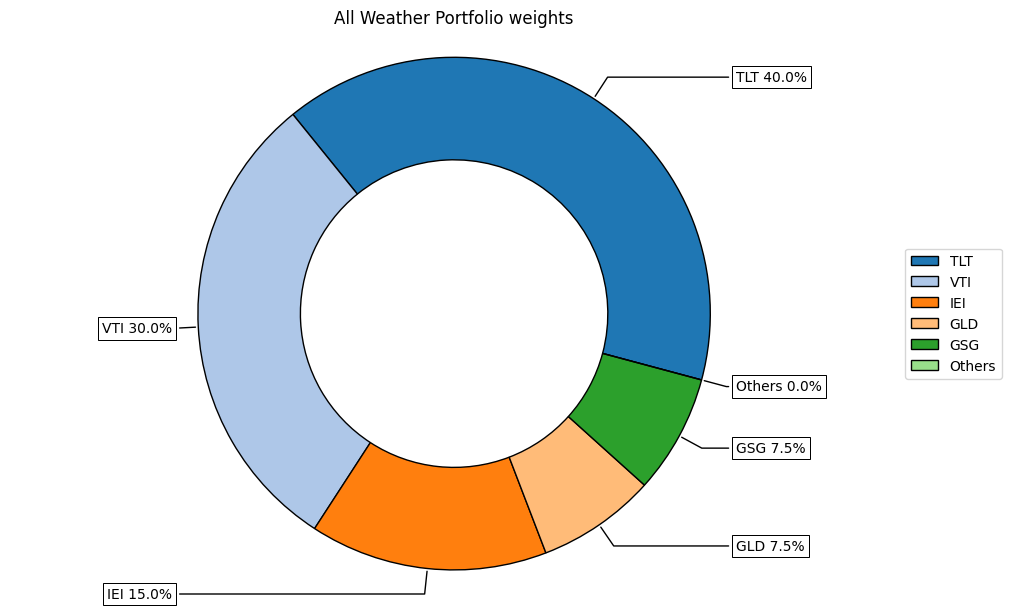

In [ ]:
# Plotting the composition of the portfolio
weights_df1 = pd.DataFrame(weights_1).T
weights_df1.columns = assets
weights_df1 = weights_df1.T

ax = rp.plot_pie(w=weights_df1, title='All Weather Portfolio weights', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

# VTI = Vanguard Total Stock Market (equity)
# TLT = 20+ Year Treasury Bond (long-term)
# IEI = 3-7 Year Treasury Bond (intermediate term)
# GLD = SPDR Gold Trust (commodity, Gold)
# GSG = iShares S&P GSCI Commodity Indexed Trust (commodity, diversified)

In [ ]:
# Calculate the daily returns of the assets
returns_1 = data.pct_change()
# Calculate the weighted returns of the assets
weighted_returns_1 = (weights_1 * returns_1)
# Calculate the portfolio return
portfolio_return_1 = weighted_returns_1.sum(axis=1)
# Calculate the cumulative portfolio return
cumulative_return_1 = (1 + portfolio_return_1).cumprod()

# Print the cumulative return
print(cumulative_return_1)

Date
2018-01-02 00:00:00+00:00   1.0000
2018-01-03 00:00:00+00:00   1.0043
2018-01-04 00:00:00+00:00   1.0056
2018-01-05 00:00:00+00:00   1.0054
2018-01-08 00:00:00+00:00   1.0060
                             ...  
2024-10-09 00:00:00+00:00   1.4237
2024-10-10 00:00:00+00:00   1.4237
2024-10-11 00:00:00+00:00   1.4260
2024-10-14 00:00:00+00:00   1.4276
2024-10-15 00:00:00+00:00   1.4301
Length: 1708, dtype: float64


In [ ]:
# Set the year frequency to 252 days
vbt.settings.returns['year_freq'] = '252 days'

ret_acc_1 = portfolio_return_1.vbt.returns(freq='d')
ret_acc_1.stats()

,0
Start,2018-01-02 00:00:00+00:00
End,2024-10-15 00:00:00+00:00
Period,1708 days 00:00:00
Total Return [%],43.0070
Annualized Return [%],5.4196
Annualized Volatility [%],9.2291
Max Drawdown [%],22.8784
Max Drawdown Duration,736 days 00:00:00
Sharpe Ratio,0.6181
Calmar Ratio,0.2369


# Objective - Sharpe ratio

In [ ]:
# Define the tickers of the assets

# Tickers of assets
assets = ['GLD', 'GSG', 'IEI', 'TLT', 'VTI']


# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  5 of 5 completed


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3721 entries, 2010-01-04 00:00:00+00:00 to 2024-10-15 00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLD     3721 non-null   float64
 1   GSG     3721 non-null   float64
 2   IEI     3721 non-null   float64
 3   TLT     3721 non-null   float64
 4   VTI     3721 non-null   float64
dtypes: float64(5)
memory usage: 174.4 KB


In [ ]:
#Calculate weights based on max Sharpe optimization
Y_1 = data[assets][data[assets].index < pd.Timestamp(middle, tz='UTC')]
# Y_1 = data[assets]
Y_1 = Y_1[assets].pct_change().dropna()

In [ ]:
!pip install ecos

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Building the portfolio object
port = rp.Portfolio(returns=Y_1)

# Calculating optimal portfolio
# Select method and estimate input parameters:
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.
port.assets_stats(method_mu = method_mu, method_cov = method_cov)

# Estimate optimal portfolio:

model = 'Classic' # Could be Classic (historical) or FM (Factor Model)
rm = 'MV'         # Risk measure used, this time will be variance
obj = 'Sharpe'    # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True       # Use historical scenarios for risk measures that depend on scenarios
rf = 0            # Risk free rate
#b = None # Risk contribution constraints vector

w_rp = port.optimization(model=model, rm=rm, rf=rf, hist=hist)

In [ ]:
# Print weights
w_rp.T

,GLD,GSG,IEI,TLT,VTI
weights,0.0000,0.0000,0.6634,0.0953,0.2413


In [ ]:
# convert to an array
w_rp.T.to_numpy()[0]

array([1.01190170e-09, 3.13792742e-10, 6.63396702e-01, 9.52927395e-02,
       2.41310557e-01])

In [ ]:
# Define the weights of the assets according to the new weights
weights_2 = w_rp.T.to_numpy()[0]
#  [0.1153, 0.0501, 0.6806, 7.234966e-09, 0.1541]

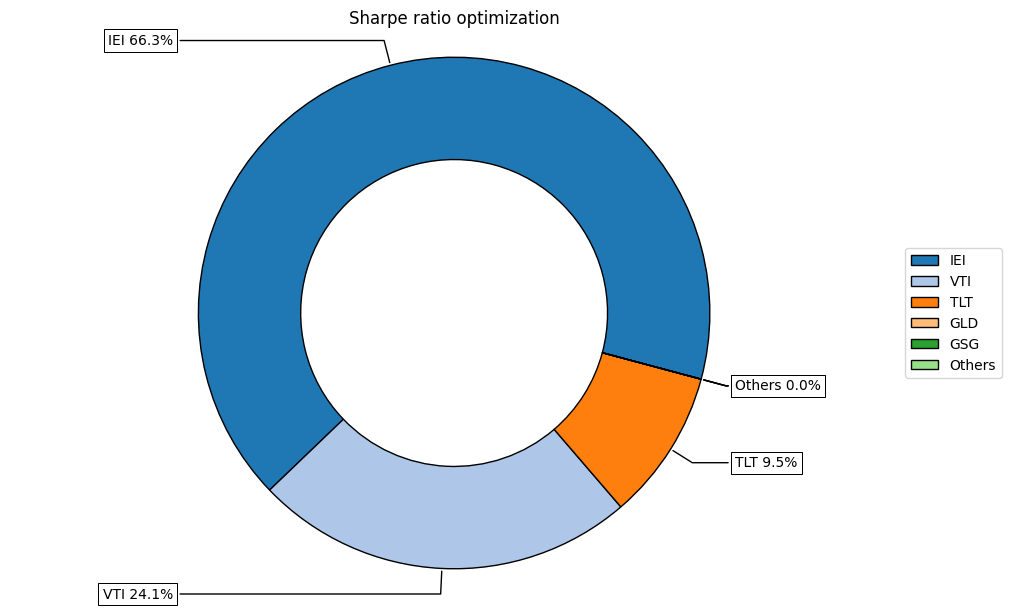

In [ ]:
# Plotting the composition of the portfolio
weights_df2 = pd.DataFrame(weights_2).T
weights_df2.columns = assets
weights_df2 = weights_df2.T

ax = rp.plot_pie(w=weights_df2, title='Sharpe ratio optimization', others=0.0000000001, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)
# VTI = Vanguard Total Stock Market (equity)
# TLT = 20+ Year Treasury Bond (long-term)
# IEI = 3-7 Year Treasury Bond (intermediate term)
# GLD = SPDR Gold Trust (commodity, Gold)
# GSG = iShares S&P GSCI Commodity Indexed Trust (commodity, diversified)

In [ ]:

points = 50 # Number of points of the frontier
frontier = port.efficient_frontier(model=model,
                                   rm=rm,
                                   points=points,
                                   rf=rf,
                                   hist=hist)
display(frontier.T.head())

,GLD,GSG,IEI,TLT,VTI
0,0.0000,0.0167,0.8836,0.0000,0.0996
1,0.0000,0.0000,0.8127,0.0116,0.1757
2,0.0000,0.0000,0.7536,0.0447,0.2017
3,0.0000,0.0000,0.6991,0.0753,0.2256
4,0.0000,0.0000,0.6476,0.1042,0.2483


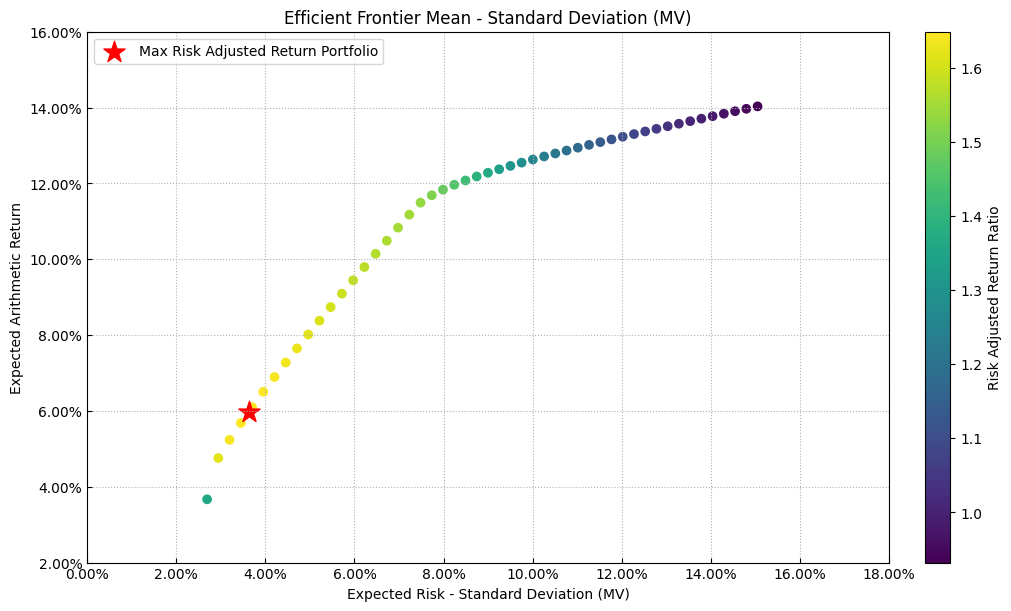

In [ ]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu           # Expected returns
cov = port.cov         # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_rp, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

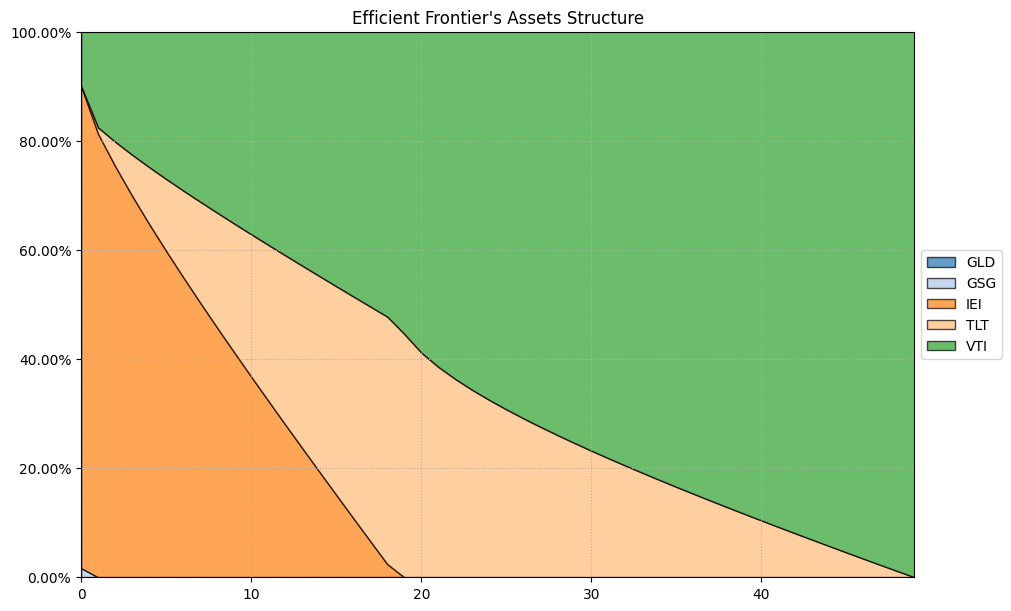

In [ ]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Set the year frequency to 252 days
vbt.settings.returns['year_freq'] = '252 days'

check = pd.DataFrame([])
check = pd.concat([Y_1['GLD'].vbt.returns(freq='d').stats(),Y_1['GSG'].vbt.returns(freq='d').stats(), Y_1['IEI'].vbt.returns(freq='d').stats(),
                   Y_1['TLT'].vbt.returns(freq='d').stats(), Y_1['VTI'].vbt.returns(freq='d').stats()], axis=1)

check.columns = ['GLD','GSG', 'IEI', 'TLT', 'VTI']
display(check[4:6])


,GLD,GSG,IEI,TLT,VTI
Annualized Return [%],1.4990,-8.3646,2.6813,7.5732,13.7607
Annualized Volatility [%],16.4620,19.3333,3.2756,14.4114,15.0475


In [ ]:
# Calculate the daily returns of the assets
returns_2 = data[assets][data[assets].index >= pd.Timestamp(middle, tz='UTC')]
# returns_2 = data[assets]
returns_2 = returns_2[assets].pct_change()
# Calculate the weighted returns of the assets
weighted_returns_2 = (weights_2 * returns_2)
# Calculate the portfolio return
portfolio_return_2 = weighted_returns_2.sum(axis=1)
# Calculate the cumulative portfolio return
cumulative_return_2 = (1 + portfolio_return_2).cumprod()

# Print the cumulative return
print(cumulative_return_2)

Date
2018-01-02 00:00:00+00:00   1.0000
2018-01-03 00:00:00+00:00   1.0020
2018-01-04 00:00:00+00:00   1.0023
2018-01-05 00:00:00+00:00   1.0030
2018-01-08 00:00:00+00:00   1.0035
                             ...  
2024-10-09 00:00:00+00:00   1.3212
2024-10-10 00:00:00+00:00   1.3206
2024-10-11 00:00:00+00:00   1.3232
2024-10-14 00:00:00+00:00   1.3246
2024-10-15 00:00:00+00:00   1.3263
Length: 1708, dtype: float64


In [ ]:
# Set the year frequency to 252 days
vbt.settings.returns['year_freq'] = '252 days'

ret_acc_2 = portfolio_return_2.vbt.returns(freq='d')
ret_acc_2.stats()

,0
Start,2018-01-02 00:00:00+00:00
End,2024-10-15 00:00:00+00:00
Period,1708 days 00:00:00
Total Return [%],32.6291
Annualized Return [%],4.2544
Annualized Volatility [%],5.9685
Max Drawdown [%],17.2024
Max Drawdown Duration,697 days 00:00:00
Sharpe Ratio,0.7280
Calmar Ratio,0.2473


# Add BTC

In [ ]:
# Define the tickers of the assets

# start = '2018-01-01'
# end = '2024-10-13'

# Tickers of assets
assets = ['BTC-USD', 'GLD', 'GSG', 'IEI', 'TLT', 'VTI']



# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  6 of 6 completed


In [ ]:
data = data.dropna()

#Calculate weights based on max Sharpe optimization
Y_2 = data[assets][data[assets].index < pd.Timestamp(middle, tz='UTC')]
# Y_2 = data[assets]
Y_2 = Y_2[assets].pct_change().dropna()

In [ ]:
# Building the portfolio object
port = rp.Portfolio(returns=Y_2)

# Calculating optimal portfolio
# Select method and estimate input parameters:
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model = 'Classic' # Could be Classic (historical) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
#b = None # Risk contribution constraints vector

w_rp = port.optimization(model=model, rm=rm, rf=rf, hist=hist)

You must convert self.cov to a positive definite matrix


In [ ]:
# Print weights
w_rp.T

,BTC-USD,GLD,GSG,IEI,TLT,VTI
weights,0.0728,0.0000,0.0000,0.5007,0.1330,0.2935


In [ ]:
# Define the weights of the assets according to the new weights
weights_3 = w_rp.T.to_numpy()[0]
#  [0.0279, 0.1018, 0.0520, 0.6874, 3.215762e-08, 0.1308]

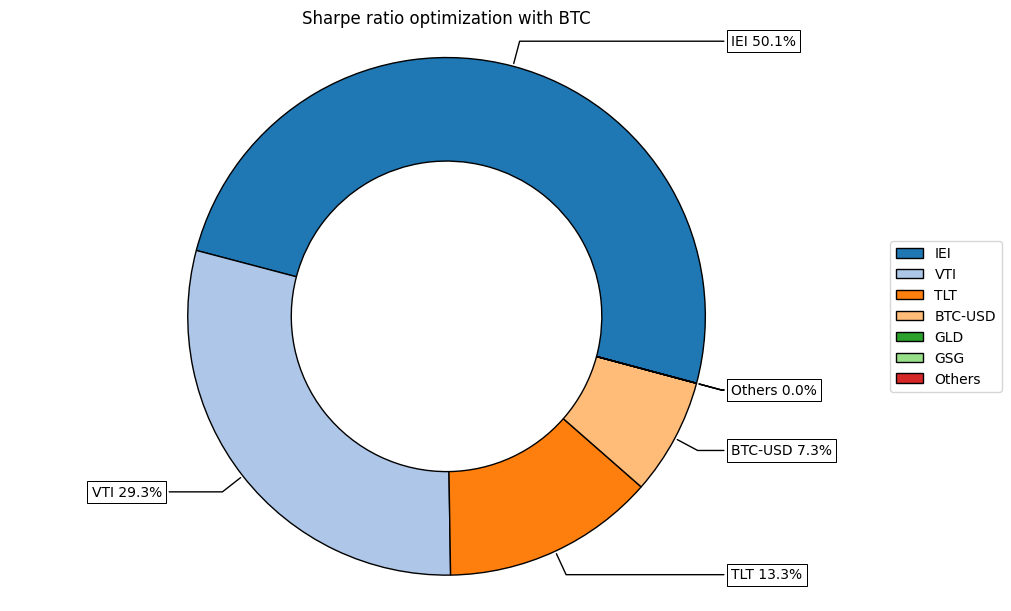

In [ ]:
# Plotting the composition of the portfolio
weights_df3 = pd.DataFrame(weights_3).T
weights_df3.columns = assets
weights_df3 = weights_df3.T

ax = rp.plot_pie(w=weights_df3, title='Sharpe ratio optimization with BTC', others=0.0000000001, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [ ]:

points = 50 # Number of points of the frontier
frontier = port.efficient_frontier(model=model,
                                   rm=rm,
                                   points=points,
                                   rf=rf,
                                   hist=hist)
display(frontier.T.head())

,BTC-USD,GLD,GSG,IEI,TLT,VTI
0,0.0011,0.0000,0.0150,0.8765,0.0000,0.1074
1,0.0403,0.0000,0.0000,0.7723,0.0000,0.1873
2,0.0590,0.0000,0.0000,0.6224,0.0720,0.2467
3,0.0764,0.0000,0.0000,0.4696,0.1486,0.3054
4,0.0934,0.0000,0.0000,0.3198,0.2237,0.3631


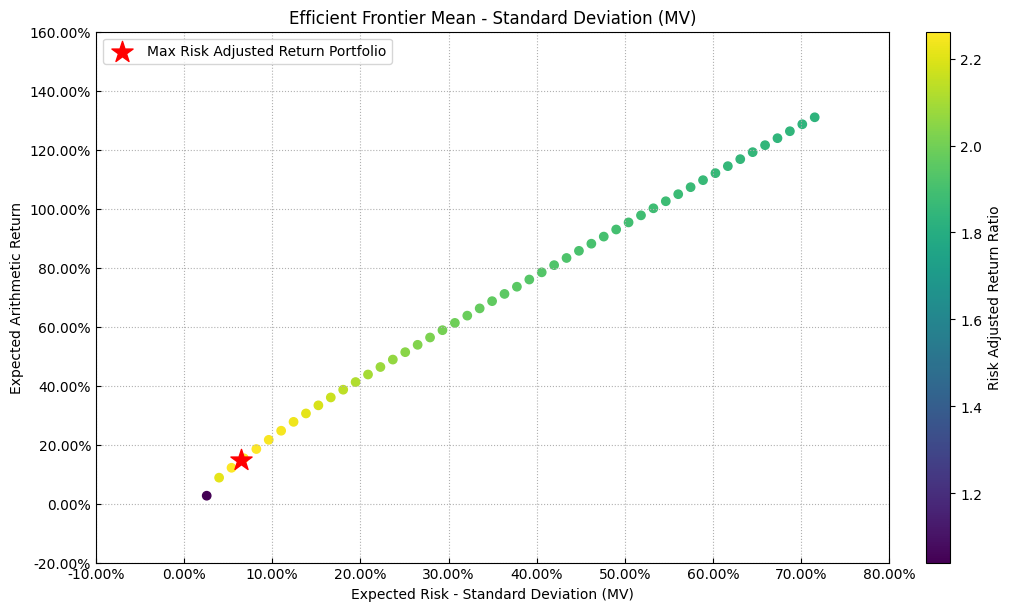

In [ ]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu           # Expected returns
cov = port.cov         # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_rp, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

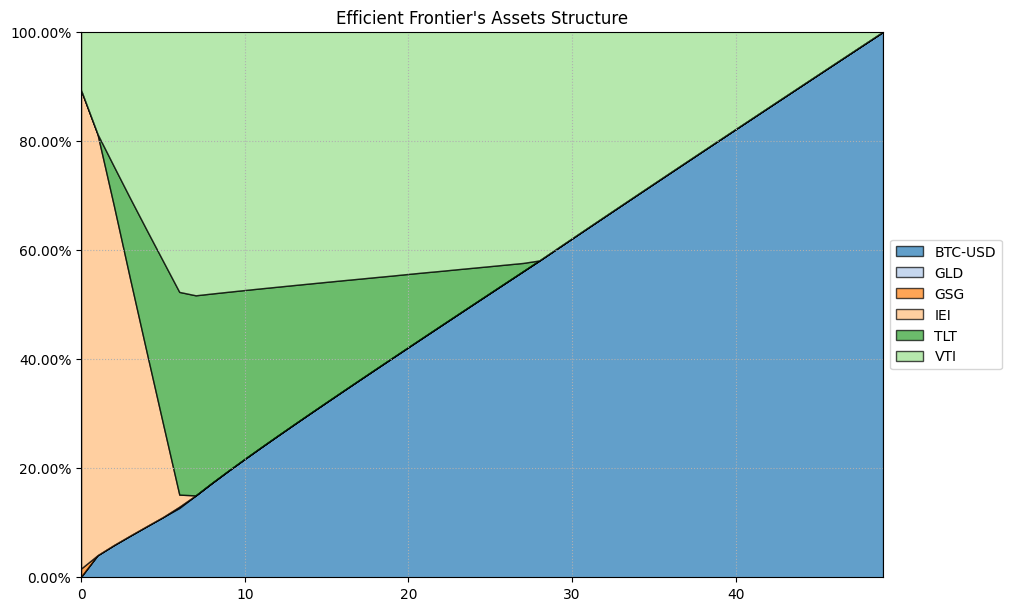

In [ ]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [ ]:
# Calculate the daily returns of the assets
returns_3 = data[assets][data[assets].index >= pd.Timestamp(middle, tz='UTC')]
# returns_3 = data[assets]
returns_3 = returns_3[assets].pct_change()
# Calculate the weighted returns of the assets
weighted_returns_3 = (weights_3 * returns_3)
# Calculate the portfolio return
portfolio_return_3 = weighted_returns_3.sum(axis=1)
# Calculate the cumulative portfolio return
cumulative_return_3 = (1 + portfolio_return_3).cumprod()

# Print the cumulative return
print(cumulative_return_3)

Date
2018-01-02 00:00:00+00:00   1.0000
2018-01-03 00:00:00+00:00   1.0035
2018-01-04 00:00:00+00:00   1.0060
2018-01-05 00:00:00+00:00   1.0157
2018-01-08 00:00:00+00:00   1.0067
                             ...  
2024-10-09 00:00:00+00:00   1.6710
2024-10-10 00:00:00+00:00   1.6691
2024-10-11 00:00:00+00:00   1.6770
2024-10-14 00:00:00+00:00   1.6869
2024-10-15 00:00:00+00:00   1.6903
Length: 1708, dtype: float64


In [ ]:
# Set the year frequency to 252 days
vbt.settings.returns['year_freq'] = '252 days'

ret_acc_3 = portfolio_return_3.vbt.returns(freq='d')
ret_acc_3.stats()

,0
Start,2018-01-02 00:00:00+00:00
End,2024-10-15 00:00:00+00:00
Period,1708 days 00:00:00
Total Return [%],69.0282
Annualized Return [%],8.0521
Annualized Volatility [%],9.2056
Max Drawdown [%],24.1449
Max Drawdown Duration,669 days 00:00:00
Sharpe Ratio,0.8875
Calmar Ratio,0.3335


In [ ]:
!pip install chart_studio

# Graphs

In [ ]:
# import chart_studio
# from plotly.offline import download_plotlyjs, init_notebook_mode,  plot #only for me
# username = 'isakdv' # <your username>
# api_key =   'oW3nkcyLdvwHGbMP0lkz' # <your api key> - go to profile in https://chart-studio.plotly.com/ > settings > regenerate key
# chart_studio.tools.set_credentials_file(username=username, api_key=api_key)


import plotly.express as px

In [ ]:
# Assuming you have the two time series cum_1 and cum_2
# Create a DataFrame
data_d = pd.DataFrame({
    'ALL WEATHER WEIGHTS': cumulative_return_1,
    'Sharpe ratio optimization': cumulative_return_2,
    'Sharpe ratio optimization with BTC': cumulative_return_3
})

# Plot the two time series
fig = px.line(data_d)
fig.show()

In [ ]:
stats = pd.DataFrame([])

stats = pd.concat([ret_acc_1.stats(), ret_acc_2.stats(),ret_acc_3.stats()], axis=1)

stats.columns = ['ALL WEATHER WEIGHTS', 'Sharpe ratio optimization', 'Sharpe ratio optimization with BTC']
display(stats)

,ALL WEATHER WEIGHTS,Sharpe ratio optimization,Sharpe ratio optimization with BTC
Start,2018-01-02 00:00:00+00:00,2018-01-02 00:00:00+00:00,2018-01-02 00:00:00+00:00
End,2024-10-15 00:00:00+00:00,2024-10-15 00:00:00+00:00,2024-10-15 00:00:00+00:00
Period,1708 days 00:00:00,1708 days 00:00:00,1708 days 00:00:00
Total Return [%],43.0070,32.6291,69.0282
Annualized Return [%],5.4196,4.2544,8.0521
Annualized Volatility [%],9.2291,5.9685,9.2056
Max Drawdown [%],22.8784,17.2024,24.1449
Max Drawdown Duration,736 days 00:00:00,697 days 00:00:00,669 days 00:00:00
Sharpe Ratio,0.6181,0.7280,0.8875
Calmar Ratio,0.2369,0.2473,0.3335


# Add More Crypto (Top 8)

In [ ]:
# Define the tickers of the assets

# start = '2018-01-01'
# end = '2024-10-13'

# Tickers of assets
crypto_assets = ['ADA-USD', 'BNB-USD', 'BTC-USD', 'DOGE-USD', 'ETH-USD', 'LTC-USD', 'TRX-USD', 'XRP-USD']

In [ ]:
# Downloading data (Volume)
data = yf.download(crypto_assets, start = start, end = end)
data = data.loc[:,('Volume', slice(None))]
data.columns = crypto_assets

[*********************100%***********************]  8 of 8 completed


In [ ]:
data.head(20)

,ADA-USD,BNB-USD,BTC-USD,DOGE-USD,ETH-USD,LTC-USD,TRX-USD,XRP-USD
Date,,,,,,,,
2014-09-17 00:00:00+00:00,NaN,NaN,21056800,NaN,NaN,3071840,NaN,NaN
2014-09-18 00:00:00+00:00,NaN,NaN,34483200,NaN,NaN,4569260,NaN,NaN
2014-09-19 00:00:00+00:00,NaN,NaN,37919700,NaN,NaN,3917450,NaN,NaN
2014-09-20 00:00:00+00:00,NaN,NaN,36863600,NaN,NaN,5490660,NaN,NaN
2014-09-21 00:00:00+00:00,NaN,NaN,26580100,NaN,NaN,2931220,NaN,NaN
2014-09-22 00:00:00+00:00,NaN,NaN,24127600,NaN,NaN,1855960,NaN,NaN
2014-09-23 00:00:00+00:00,NaN,NaN,45099500,NaN,NaN,4661670,NaN,NaN
2014-09-24 00:00:00+00:00,NaN,NaN,30627700,NaN,NaN,2662290,NaN,NaN
2014-09-25 00:00:00+00:00,NaN,NaN,26814400,NaN,NaN,2046960,NaN,NaN


In [ ]:
# Extract the volume data for the last date available
last_date_volume = data.loc[data.index[-1]]

# Create a DataFrame to hold the volume data for the last date
crypto_volume_df = last_date_volume.reset_index()
crypto_volume_df.columns = ["Ticker", "Volume"]

# Create the bubble chart using Plotly Express
fig = px.scatter(crypto_volume_df, x="Ticker", y="Volume", size="Volume", color="Ticker",
                 size_max=40, title="Cryptocurrency Volume Bubble Chart (Last Date)",
                 labels={"Ticker": "Cryptocurrency", "Volume": "Volume"})

# Show the chart
fig.show()



In [ ]:
# Extract the volume data for the last date available
last_date_volume = data.loc[data.index[-1]]

# Create a DataFrame to hold the volume data for the last date
crypto_volume_df = last_date_volume.reset_index()
crypto_volume_df.columns = ["Ticker", "Volume"]

# Create the bar chart using Plotly Express
fig = px.bar(crypto_volume_df, x="Ticker", y="Volume", color="Ticker",
             title="Cryptocurrency Volume Bar Chart (Last Date)",
             labels={"Ticker": "Cryptocurrency", "Volume": "Volume"})

# Show the chart
fig.show()

In [ ]:
# Downloading data (Adj Price)
data_pr = yf.download(crypto_assets, start = start, end = end)
data_pr = data_pr.loc[:,('Adj Close', slice(None))]
data_pr.columns = crypto_assets

[*********************100%***********************]  8 of 8 completed


In [ ]:
pd.options.display.float_format = '{:.4f}'.format
data_pr.head(20)

,ADA-USD,BNB-USD,BTC-USD,DOGE-USD,ETH-USD,LTC-USD,TRX-USD,XRP-USD
Date,,,,,,,,
2014-09-17 00:00:00+00:00,NaN,NaN,457.3340,NaN,NaN,5.0585,NaN,NaN
2014-09-18 00:00:00+00:00,NaN,NaN,424.4400,NaN,NaN,4.6852,NaN,NaN
2014-09-19 00:00:00+00:00,NaN,NaN,394.7960,NaN,NaN,4.3278,NaN,NaN
2014-09-20 00:00:00+00:00,NaN,NaN,408.9040,NaN,NaN,4.2864,NaN,NaN
2014-09-21 00:00:00+00:00,NaN,NaN,398.8210,NaN,NaN,4.2459,NaN,NaN
2014-09-22 00:00:00+00:00,NaN,NaN,402.1520,NaN,NaN,4.2424,NaN,NaN
2014-09-23 00:00:00+00:00,NaN,NaN,435.7910,NaN,NaN,4.7466,NaN,NaN
2014-09-24 00:00:00+00:00,NaN,NaN,423.2050,NaN,NaN,4.6668,NaN,NaN
2014-09-25 00:00:00+00:00,NaN,NaN,411.5740,NaN,NaN,4.5146,NaN,NaN


In [ ]:
################### correlation

# Calculate the correlation between Bitcoin and all other coins
correlations = data_pr.corr().loc['BTC-USD'].drop('BTC-USD')
# Convert the correlation results into a DataFrame
corr_results = pd.DataFrame(correlations).reset_index()
corr_results.columns = ['coin', 'correlation']
# Display the correlation results
print(corr_results)

       coin  correlation
0   ADA-USD       0.6403
1   BNB-USD       0.9174
2  DOGE-USD       0.7296
3   ETH-USD       0.9248
4   LTC-USD       0.6133
5   TRX-USD       0.8527
6   XRP-USD       0.4366


In [ ]:
# Create a horizontal box plot with annotations
fig = px.box(corr_results, x='correlation', orientation='h', title='Correlation between Bitcoin and other coins')
fig.update_layout(width=16*72, height=7*72)

# Add annotations
for index, row in corr_results.iterrows():
    fig.add_annotation(
        x=row['correlation'],
        y=0,
        text=row['coin'],
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-30,
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='black',
        borderwidth=1,
        borderpad=2,
        font=dict(size=10),
        textangle=-45
    )

# Show the plot
fig.show()

In [ ]:
import plotly.graph_objs as go
# Normalize the data to the same starting point
normalized_data = data_pr.div(data_pr.iloc[0])
fig = go.Figure()

# Add the bitcoin trace with a bold line
#fig.add_trace(go.Scatter(x=normalized_data.index, y=np.log(normalized_data['bitcoin']), name='bitcoin', line=dict(width=6)))

# Add the other columns with thinner lines
for col in normalized_data.columns:
    if col != 'bitcoin':
        fig.add_trace(go.Scatter(x=normalized_data.index, y=np.log(normalized_data[col]), name=col, line=dict(width=1)))

fig.add_trace(go.Scatter(x=normalized_data.index, y=np.log(normalized_data['BTC-USD']), name='bitcoin', line=dict(width=4)))

fig.update_layout(title='Overall price dynamics', barmode='stack', width=16*72, height=7*72)
fig.show()


# Sharpe with 8 crypto coins

In [ ]:
# Define the tickers of the assets

# start = '2018-01-01'
# end = '2024-10-13'

# Tickers of assets
assets = ['ADA-USD', 'BNB-USD', 'BTC-USD', 'DOGE-USD', 'ETH-USD', 'GLD', 'GSG', 'IEI', 'LTC-USD', 'TRX-USD', 'TLT', 'VTI', 'XRP-USD']

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  13 of 13 completed


In [ ]:
data = data.dropna()

#Calculate weights based on max Sharpe optimization
Y_3 = data[assets][data[assets].index < pd.Timestamp(middle, tz='UTC')]
# Y_3 = data[assets]
Y_3 = Y_3[assets].pct_change().dropna()

In [ ]:
# Building the portfolio object
port = rp.Portfolio(returns=Y_3)

# Calculating optimal portfolio
# Select method and estimate input parameters:
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model = 'Classic' # Could be Classic (historical) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
#b = None # Risk contribution constraints vector

w_rp = port.optimization(model=model, rm=rm, rf=rf, hist=hist)

You must convert self.cov to a positive definite matrix


In [ ]:
# Print weights
w_rp.T

,ADA-USD,BNB-USD,BTC-USD,DOGE-USD,ETH-USD,GLD,GSG,IEI,LTC-USD,TRX-USD,TLT,VTI,XRP-USD
weights,0.0000,0.0005,0.0352,0.0000,0.0000,0.0637,0.1697,0.0000,0.0050,0.0000,0.0056,0.6989,0.0213


In [ ]:
# Define the weights of the assets according to the new weights
weights_4 = w_rp.T.to_numpy()[0]
#  [0.0000,	0.0589,	0.0000,	0.0156,	0.0000,	0.0670,	0.0649,	0.7228,	0.0000,	0.0000,	0.0000,	0.0707,	0.0000]

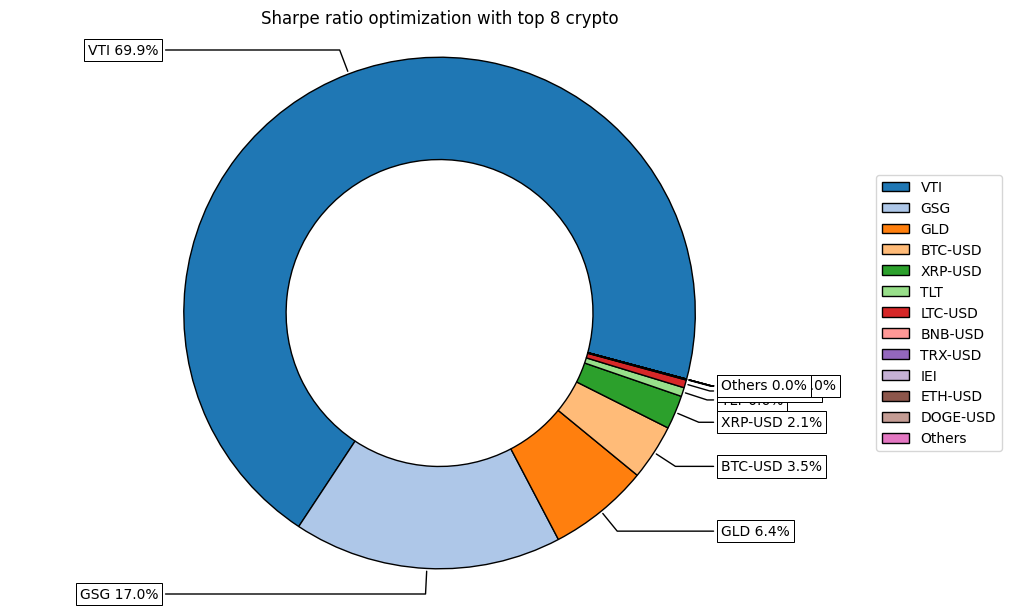

In [ ]:
# Plotting the composition of the portfolio
weights_df4 = pd.DataFrame(weights_4).T
weights_df4.columns = assets
weights_df4 = weights_df4.T

ax = rp.plot_pie(w=weights_df4, title='Sharpe ratio optimization with top 8 crypto', others=0.0000000001, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [ ]:
points = 50 # Number of points of the frontier
frontier = port.efficient_frontier(model=model,
                                   rm=rm,
                                   points=points,
                                   rf=rf,
                                   hist=hist)
display(frontier.T.head())

,ADA-USD,BNB-USD,BTC-USD,DOGE-USD,ETH-USD,GLD,GSG,IEI,LTC-USD,TRX-USD,TLT,VTI,XRP-USD
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080,0.8507,0.0000,0.0000,0.0000,0.1413,0.0000
1,0.0000,0.0028,0.0440,0.0000,0.0000,0.0000,0.1899,0.0000,0.0084,0.0000,0.0085,0.7173,0.0291
2,0.0000,0.0103,0.0746,0.0014,0.0000,0.0000,0.1524,0.0000,0.0212,0.0000,0.0170,0.6688,0.0543
3,0.0000,0.0171,0.1043,0.0040,0.0000,0.0000,0.1129,0.0000,0.0336,0.0000,0.0250,0.6244,0.0787
4,0.0000,0.0238,0.1337,0.0066,0.0000,0.0000,0.0737,0.0000,0.0459,0.0000,0.0330,0.5803,0.1030


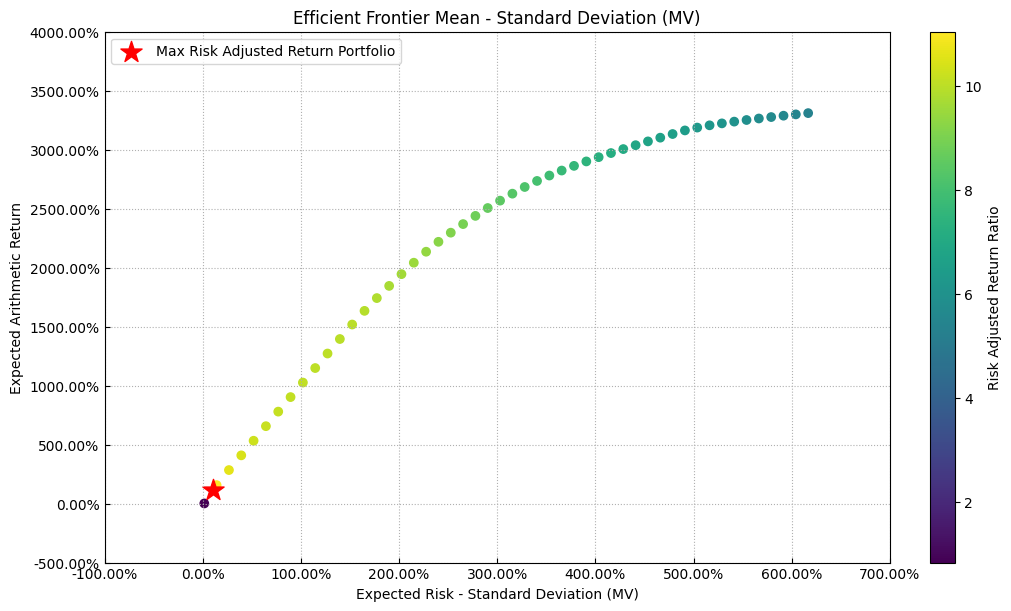

In [ ]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu           # Expected returns
cov = port.cov         # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_rp, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

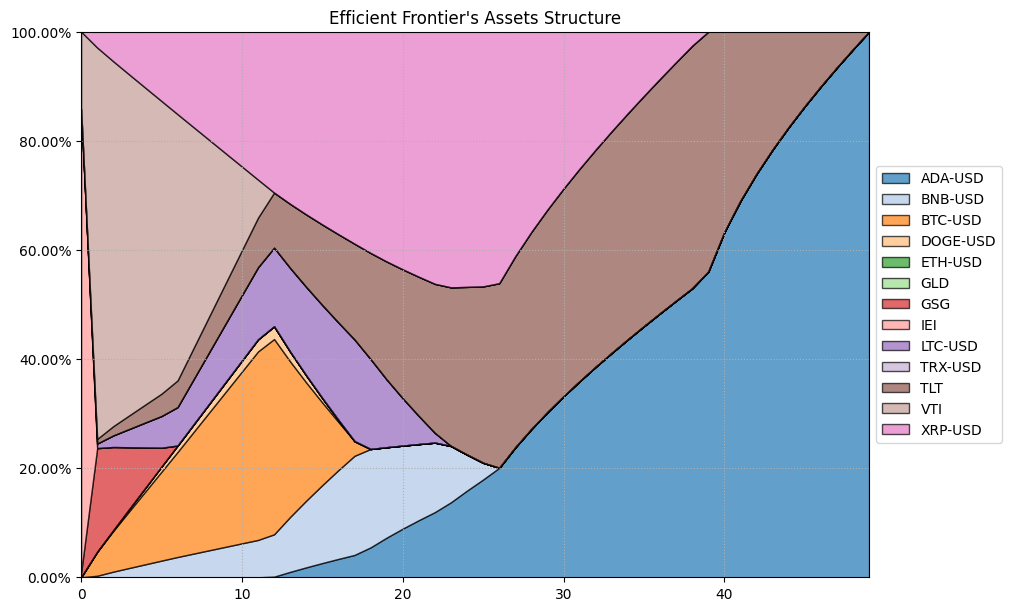

In [ ]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [ ]:
# Calculate the daily returns of the assets
returns_4 = data[assets][data[assets].index >= pd.Timestamp(middle, tz='UTC' )]
# returns_4 = data[assets]
returns_4 = returns_4[assets].pct_change()
# Calculate the weighted returns of the assets
weighted_returns_4 = (weights_4 * returns_4)
# Calculate the portfolio return
portfolio_return_4 = weighted_returns_4.sum(axis=1)
# Calculate the cumulative portfolio return
cumulative_return_4 = (1 + portfolio_return_4).cumprod()

# Print the cumulative return
print(cumulative_return_4)

Date
2018-01-02 00:00:00+00:00   1.0000
2018-01-03 00:00:00+00:00   1.0125
2018-01-04 00:00:00+00:00   1.0238
2018-01-05 00:00:00+00:00   1.0306
2018-01-08 00:00:00+00:00   1.0220
                             ...  
2024-10-09 00:00:00+00:00   2.4049
2024-10-10 00:00:00+00:00   2.4107
2024-10-11 00:00:00+00:00   2.4295
2024-10-14 00:00:00+00:00   2.4421
2024-10-15 00:00:00+00:00   2.4229
Length: 1708, dtype: float64


In [ ]:
# Set the year frequency to 252 days
vbt.settings.returns['year_freq'] = '252 days'

ret_acc_4 = portfolio_return_4.vbt.returns(freq='d')
ret_acc_4.stats()

,0
Start,2018-01-02 00:00:00+00:00
End,2024-10-15 00:00:00+00:00
Period,1708 days 00:00:00
Total Return [%],142.2867
Annualized Return [%],13.9474
Annualized Volatility [%],18.0340
Max Drawdown [%],33.2082
Max Drawdown Duration,421 days 00:00:00
Sharpe Ratio,0.8151
Calmar Ratio,0.4200


In [ ]:
# Assuming you have the two time series cum_1 and cum_2
# Create a DataFrame
data_d = pd.DataFrame({
    'ALL WEATHER WEIGHTS': cumulative_return_1,
    'Sharpe ratio optimization': cumulative_return_2,
    'Sharpe ratio optimization with BTC': cumulative_return_3,
    'Sharpe ratio optimization with top 8 crypto': cumulative_return_4
})

# Plot the two time series
fig = px.line(data_d)
fig.show()

In [ ]:
stats = pd.DataFrame([])

stats = pd.concat([ret_acc_1.stats(), ret_acc_2.stats(), ret_acc_3.stats(), ret_acc_4.stats()], axis=1)

stats.columns = ['ALL WEATHER WEIGHTS', 'Sharpe ratio optimization', 'Sharpe ratio optimization with BTC', 'Sharpe ratio optimization with top 8 crypto']
display(stats)

,ALL WEATHER WEIGHTS,Sharpe ratio optimization,Sharpe ratio optimization with BTC,Sharpe ratio optimization with top 8 crypto
Start,2018-01-02 00:00:00+00:00,2018-01-02 00:00:00+00:00,2018-01-02 00:00:00+00:00,2018-01-02 00:00:00+00:00
End,2024-10-15 00:00:00+00:00,2024-10-15 00:00:00+00:00,2024-10-15 00:00:00+00:00,2024-10-15 00:00:00+00:00
Period,1708 days 00:00:00,1708 days 00:00:00,1708 days 00:00:00,1708 days 00:00:00
Total Return [%],43.0070,32.6291,69.0282,142.2867
Annualized Return [%],5.4196,4.2544,8.0521,13.9474
Annualized Volatility [%],9.2291,5.9685,9.2056,18.0340
Max Drawdown [%],22.8784,17.2024,24.1449,33.2082
Max Drawdown Duration,736 days 00:00:00,697 days 00:00:00,669 days 00:00:00,421 days 00:00:00
Sharpe Ratio,0.6181,0.7280,0.8875,0.8151
Calmar Ratio,0.2369,0.2473,0.3335,0.4200
